<a href="https://colab.research.google.com/github/vbvss199/colab_notebooks/blob/main/admfinalemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the necessary libraries
import torch
import torch.nn as nn
import torch.functional as F
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
from torch.utils.data import DataLoader,TensorDataset, random_split, WeightedRandomSampler
import torch.optim as optim
from torchsummary import summary

In [ ]:
data=pd.read_excel('pre-processed-data_college_code.xlsx')

In [ ]:
data.columns

Index(['Application Major', 'Scholarship_Awarded', 'Application CGPA',
       'FAFSA Filed', 'High School Code', 'Financial Aid Appeal',
       'Accepted Student Day Event Attended', 'Campus Visits - Person',
       'Campus Visits - App', 'Logins Before Admit', 'Acceptance Call Success',
       'Application Consider Test Scores', 'Application ACRK',
       'Waitlist Confirmed Date', 'Emails Sent', 'Emails Opened',
       'Was Inquiry', 'Athlete', 'admitted', 'Address 1 Region_Midwest',
       'Address 1 Region_Military', 'Address 1 Region_Northeast',
       'Address 1 Region_South', 'Address 1 Region_Southwest',
       'Address 1 Region_Territory', 'Address 1 Region_West',
       'Application Housing_Commuter', 'Application Housing_Residential',
       'Application Enroll Status_Full Time',
       'Application Enroll Status_Part Time', 'Person Sex_F', 'Person Sex_M',
       'Person Sex_Unknown', 'High School Region_Midwest',
       'High School Region_Military', 'High School Region_Nor

In [ ]:

inputs=data.drop(['admitted'],axis=1).to_numpy()
labels=data['admitted'].to_numpy()

In [ ]:
input_embedding_dimension=len(set(inputs[:,0]))
input_embedding_dimension

102

In [ ]:
len(set(inputs[:,4]))

3032

In [ ]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    inputs, labels, test_size=0.2, random_state=42, stratify=labels
)
# Convert to PyTorch tensors only once
train_inputs = torch.from_numpy(train_inputs).float()
test_inputs = torch.from_numpy(test_inputs).float()
train_labels = torch.from_numpy(train_labels).int()
test_labels = torch.from_numpy(test_labels).int()

In [ ]:
#The TensorDataset class in PyTorch is a utility class that is used to wrap data tensors (such as features and labels)
#This class is particularly useful when you want to work with datasets where features and labels are already stored as tensors.
train_dataset = TensorDataset(train_inputs, train_labels)
test_dataset = TensorDataset(test_inputs, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# class NeuralNetwork(nn.Module):
#     def __init__(self, i, h_size, h_next_size, h_next_next_size=19, n_classes=2,
#                  how_many_layers=4, embedding_dim=12):
#         super(NeuralNetwork, self).__init__()

#         features = i.shape[1]  # Total number of input features

#         self.major_embedding = nn.Embedding(input_embedding_dimension, embedding_dim)
#         # Input to fc1 will be (features - 1) continuous + embedding_dim
#         self.fc1 = nn.Linear(features - 1 + embedding_dim, h_size)
#         self.layers = how_many_layers

#         if self.layers == 2:
#             self.fc2 = nn.Linear(h_size, n_classes)
#         elif self.layers == 3:
#             self.fc3 = nn.Linear(h_size, h_next_size)
#             self.fc4 = nn.Linear(h_next_size, n_classes)
#         elif self.layers == 4:
#             self.fc3 = nn.Linear(h_size, h_next_size)
#             self.fc4 = nn.Linear(h_next_size, h_next_next_size)
#             self.fc5 = nn.Linear(h_next_next_size, n_classes)

#     def forward(self, X):
#         # Ensure input is float and extract categorical/continuous features
#         categorical_input = X[:, 0].long()  # First column: categorical (encoded)
#         continuous_input = X[:, 1:].float() # Rest: continuous features

#         # Apply embedding
#         embedded = self.major_embedding(categorical_input)  # Shape: [batch_size, embedding_dim]
#         # Concatenate with continuous features
#         X = torch.cat((embedded, continuous_input), dim=1)  # Shape: [batch_size, embedding_dim + (features-1)]

#         if self.layers == 2:
#             X = F.relu(self.fc1(X))
#             X = self.fc2(X)
#         elif self.layers == 3:
#             X = F.relu(self.fc1(X))
#             X = F.relu(self.fc3(X))
#             X = self.fc4(X)
#         elif self.layers == 4:
#             X = F.relu(self.fc1(X))
#             X = torch.tanh(self.fc3(X))
#             X = F.sigmoid(self.fc4(X))
#             X = self.fc5(X)

#         return X


# net = NeuralNetwork(train_inputs, h_size=27, h_next_size=22, how_many_layers=4)
# print(f"Expected input features to fc1: {train_inputs.shape[1] - 1 + 8}")  # Debug print
# print(f"fc1 weight shape: {net.fc1.weight.shape}")  # Debug printn_epochs = 600


# n_epochs = 600
# learning_rate = 0.001
# decay_rate = learning_rate / n_epochs
# optimizer = optim.Adam(net.parameters(), lr=learning_rate, weight_decay=decay_rate)
# lambda_reg = 0.01
# lambda_entropy = 0


# def loss_fn(model, outputs, targets):
#     # Convert labels to numpy
#     y_train = train_labels.numpy()

#     # Compute class weights
#     class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)

#     # Convert to PyTorch tensor
#     class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

#     cross_entropy = nn.functional.cross_entropy(outputs, targets,weight=class_weights_tensor)
#     l2_regularization = 0
#     entropy_regularization = 0

#     for param in model.parameters():
#         l2_regularization += torch.norm(param, p=2) ** 2
#         entropy_regularization += torch.mean(torch.sum(-outputs * torch.log(outputs), dim=1))

#     loss = cross_entropy + lambda_reg * l2_regularization
#     return loss

# def test_instance(model):
#     y_t = []
#     y_s = []
#     loss = 0
#     acc = 0

#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             loss += loss_fn(model, outputs, labels.long())
#             y_t.extend(labels.numpy().astype('int'))
#             y_s.extend(torch.sigmoid(outputs).max(axis=1).indices.numpy())

#     acc = accuracy_score(y_t, y_s)
#     return loss, acc

# iteration = 0
# counter = 0

# for epoch in range(n_epochs):
#     running_loss = 0.0
#     total = 0  # No. of total predictions
#     correct = 0  # No. of correct predictions

#     for i, (inputs, labels) in enumerate(train_loader):
#         optimizer.zero_grad()
#         outputs = net(inputs)
#         loss = loss_fn(net, outputs, labels.long())
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * inputs.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
#     epoch_loss = running_loss / len(train_loader.dataset)  # Loss in every epoch
#     epoch_acc = correct / total  # Accuracy for every epoch

#     if epoch % 10 == 0 or epoch == n_epochs - 1:
#         print(f'Epoch: {epoch + 1}/{n_epochs} | pLoss: {running_loss / len(inputs)} | Accuracy: {epoch_acc} | Loss: {epoch_loss}')

#     if epoch % 50 == 0:
#         test_loss, test_acc = test_instance(net)
#         print(f'Epoch: {epoch + 1} | The test data Accuracy = {test_acc} | Test Loss = {test_loss}')

#         if counter < test_acc:
#             save_net = net
#             counter = test_acc

# y_true = []
# y_scores = []
# test_loss = 0

# with torch.no_grad():
#     for inputs, labels in test_loader:
#         outputs = save_net(inputs)
#         test_loss += loss_fn(net, outputs, labels.long())
#         y_true.extend(labels.numpy().astype('int'))
#         y_scores.extend(torch.sigmoid(outputs).max(axis=1).indices.numpy())


# accuracy = accuracy_score(y_true, y_scores)
# precision = precision_score(y_true, y_scores)
# recall = recall_score(y_true, y_scores)
# f1_val = f1_score(y_true, y_scores)
# auc_roc = roc_auc_score(y_true, y_scores)

# print('Accuracy: {:.4f}'.format(accuracy))
# print('Precision: {:.4f}'.format(precision))
# print('Recall: {:.4f}'.format(recall))
# print('F1 Score: {:.4f}'.format(f1_val))
# print('AUROC Score: {:.4f}'.format(auc_roc))


In [ ]:
# net

In [ ]:

# embedding_matrix = net.major_embedding.weight
# cos_sim = F.cosine_similarity(embedding_matrix.unsqueeze(1), embedding_matrix.unsqueeze(0), dim=2)

# # Set diagonal elements to -1 to ignore self-similarity (1.0 for identical vectors)
# cos_sim.fill_diagonal_(-1)

# # Define a similarity threshold (e.g., 0.8 for high similarity)
# threshold = 0.8

# # Find pairs of indices where similarity is high
# similar_indices = torch.nonzero(cos_sim > threshold, as_tuple=False)

# # Print the highly similar tensor indices
# print("Highly similar vector indices (pairs):\n", similar_indices)


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Compute Confusion Matrix
# cm = confusion_matrix(y_true, y_scores)

# # Print the matrix
# print("Confusion Matrix:\n", cm)

# # Plot the Confusion Matrix
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# from sklearn.metrics import confusion_matrix

# # Compute Confusion Matrix
# cm = confusion_matrix(y_true, y_scores)

# # Extract TP, TN, FP, FN
# TN = cm[0, 0]  # True Negative
# FP = cm[0, 1]  # False Positive
# FN = cm[1, 0]  # False Negative
# TP = cm[1, 1]  # True Positive

# print(f"True Positives (TP): {TP}")
# print(f"False Positives (FP): {FP}")
# print(f"True Negatives (TN): {TN}")
# print(f"False Negatives (FN): {FN}")


## High school embedding


In [ ]:
len(set(inputs[:,4]))

3032

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

class NeuralNetwork(nn.Module):
    def __init__(self, i, h_size, h_next_size, h_next_next_size=19, n_classes=2,
                 how_many_layers=4, embedding_dim=12,hs_embedding_dim=50):
        super(NeuralNetwork, self).__init__()

        features = i.shape[1]  # Total number of input features

        self.major_embedding = nn.Embedding(input_embedding_dimension, embedding_dim)

        #embedding layer for the high school codes
        self.hs_embedding=nn.Embedding(len(set(inputs[:,4])),hs_embedding_dim)

        # Input to fc1 will be (features - 2) continuous + embedding_dim
        self.fc1 = nn.Linear(features - 2 + embedding_dim + hs_embedding_dim, h_size)
        self.layers = how_many_layers

        if self.layers == 2:
            self.fc2 = nn.Linear(h_size, n_classes)
        elif self.layers == 3:
            self.fc3 = nn.Linear(h_size, h_next_size)
            self.fc4 = nn.Linear(h_next_size, n_classes)
        elif self.layers == 4:
            self.fc3 = nn.Linear(h_size, h_next_size)
            self.fc4 = nn.Linear(h_next_size, h_next_next_size)
            self.fc5 = nn.Linear(h_next_next_size, n_classes)

    def forward(self, X):
        # Ensure input is float and extract categorical/continuous features
        categorical_input = X[:, 0].long()  # First column: categorical (encoded)
        hs_input = X[:, 4].long()

        #continuous_input = X[:, 1:].float() # Rest: continuous features
        continuous_indices = [i for i in range(X.shape[1]) if i not in [0, 4]]
        continuous_input = X[:, continuous_indices].float()

        # Apply embedding
        embedded = self.major_embedding(categorical_input)  # Shape: [batch_size, embedding_dim]
        hs_embedded = self.hs_embedding(hs_input)

        # Concatenate with continuous features
        X = torch.cat((embedded,hs_embedded, continuous_input), dim=1)  # Shape: [batch_size, embedding_dim + (features-1)]

        if self.layers == 2:
            X = F.relu(self.fc1(X))
            X = self.fc2(X)
        elif self.layers == 3:
            X = F.relu(self.fc1(X))
            X = F.relu(self.fc3(X))
            X = self.fc4(X)
        elif self.layers == 4:
            X = F.relu(self.fc1(X))
            X = torch.tanh(self.fc3(X))
            X = F.sigmoid(self.fc4(X))
            X = self.fc5(X)

        return X


net = NeuralNetwork(train_inputs, h_size=27, h_next_size=22, how_many_layers=4)
print(f"Expected input features to fc1: {train_inputs.shape[1] - 1 + 8}")  # Debug print
print(f"fc1 weight shape: {net.fc1.weight.shape}")  # Debug printn_epochs = 600


n_epochs = 600
learning_rate = 0.001
decay_rate = learning_rate / n_epochs
optimizer = optim.Adam(net.parameters(), lr=learning_rate, weight_decay=decay_rate)
lambda_reg = 0.01
lambda_entropy = 0


def loss_fn(model, outputs, targets):
    # Convert labels to numpy
    y_train = train_labels.numpy()

    # Compute class weights
    class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)

    # Convert to PyTorch tensor
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

    cross_entropy = nn.functional.cross_entropy(outputs, targets,weight=class_weights_tensor)
    l2_regularization = 0
    entropy_regularization = 0

    for param in model.parameters():
        l2_regularization += torch.norm(param, p=2) ** 2
        entropy_regularization += torch.mean(torch.sum(-outputs * torch.log(outputs), dim=1))

    loss = cross_entropy + lambda_reg * l2_regularization
    return loss

def test_instance(model):
    y_t = []
    y_s = []
    loss = 0
    acc = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss += loss_fn(model, outputs, labels.long())
            y_t.extend(labels.numpy().astype('int'))
            y_s.extend(torch.sigmoid(outputs).max(axis=1).indices.numpy())

    acc = accuracy_score(y_t, y_s)
    return loss, acc

iteration = 0
counter = 0

for epoch in range(n_epochs):
    running_loss = 0.0
    total = 0  # No. of total predictions
    correct = 0  # No. of correct predictions

    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(net, outputs, labels.long())
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(train_loader.dataset)  # Loss in every epoch
    epoch_acc = correct / total  # Accuracy for every epoch

    if epoch % 10 == 0 or epoch == n_epochs - 1:
        print(f'Epoch: {epoch + 1}/{n_epochs} | pLoss: {running_loss / len(inputs)} | Accuracy: {epoch_acc} | Loss: {epoch_loss}')

    if epoch % 50 == 0:
        test_loss, test_acc = test_instance(net)
        print(f'Epoch: {epoch + 1} | The test data Accuracy = {test_acc} | Test Loss = {test_loss}')

        if counter < test_acc:
            save_net = net
            counter = test_acc

y_true = []
y_scores = []
test_loss = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = save_net(inputs)
        test_loss += loss_fn(net, outputs, labels.long())
        y_true.extend(labels.numpy().astype('int'))
        y_scores.extend(torch.sigmoid(outputs).max(axis=1).indices.numpy())


accuracy = accuracy_score(y_true, y_scores)
precision = precision_score(y_true, y_scores)
recall = recall_score(y_true, y_scores)
f1_val = f1_score(y_true, y_scores)
auc_roc = roc_auc_score(y_true, y_scores)

print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1_val))
print('AUROC Score: {:.4f}'.format(auc_roc))


Expected input features to fc1: 55
fc1 weight shape: torch.Size([27, 108])
Epoch: 1/600 | pLoss: 725512.7387424045 | Accuracy: 0.9191100020794344 | Loss: 1357.7905279021918
Epoch: 1 | The test data Accuracy = 0.935966735966736 | Test Loss = 45620.73046875
Epoch: 11/600 | pLoss: 68887.3301595052 | Accuracy: 0.9498856311083386 | Loss: 128.9220152704402
Epoch: 21/600 | pLoss: 4998.381616592407 | Accuracy: 0.950509461426492 | Loss: 9.354425982393776
Epoch: 31/600 | pLoss: 313.13728443781537 | Accuracy: 0.950509461426492 | Loss: 0.5860335953296607
Epoch: 41/600 | pLoss: 123.31917132602797 | Accuracy: 0.949677687668954 | Loss: 0.23079071364821205
Epoch: 51/600 | pLoss: 119.2380240658919 | Accuracy: 0.9480141401538782 | Loss: 0.2231528834670466
Epoch: 51 | The test data Accuracy = 0.9501039501039501 | Test Loss = 8.539522171020508
Epoch: 61/600 | pLoss: 119.15467440419727 | Accuracy: 0.9501975462674153 | Loss: 0.22299689532912775
Epoch: 71/600 | pLoss: 119.05294522974226 | Accuracy: 0.9500935

Confusion Matrix:
 [[1965  147]
 [   4  289]]


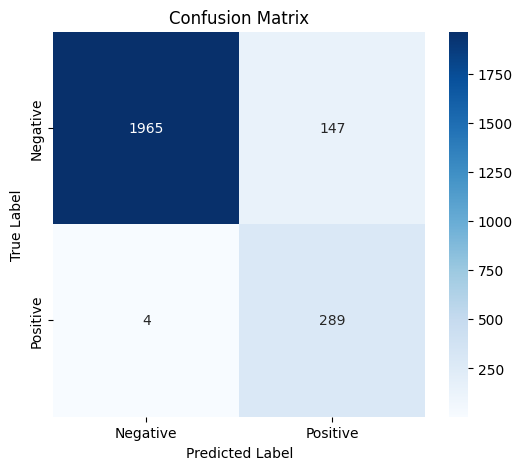

True Positives (TP): 289
False Positives (FP): 147
True Negatives (TN): 1965
False Negatives (FN): 4


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_scores)

# Print the matrix
print("Confusion Matrix:\n", cm)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_scores)

# Extract TP, TN, FP, FN
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative
TP = cm[1, 1]  # True Positive

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


NameError: name 'torch' is not defined

In [ ]:
print(net)
print(net.state_dict().keys())  # Should print parameter names
torch.save(net.state_dict(),'final_model.pth')
torch.save(net, 'final_model.pth')


NeuralNetwork(
  (major_embedding): Embedding(102, 12)
  (hs_embedding): Embedding(3032, 50)
  (fc1): Linear(in_features=108, out_features=27, bias=True)
  (fc3): Linear(in_features=27, out_features=22, bias=True)
  (fc4): Linear(in_features=22, out_features=19, bias=True)
  (fc5): Linear(in_features=19, out_features=2, bias=True)
)
odict_keys(['major_embedding.weight', 'hs_embedding.weight', 'fc1.weight', 'fc1.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias', 'fc5.weight', 'fc5.bias'])


## hp training

## pca


In [ ]:
# # Importing all the necessary libraries
# import torch
# import torch.nn as nn
# import torch.nn.functional as F  # Fixed torch.functional to torch.nn.functional
# import pandas as pd
# import numpy as np
# import sys
# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
# from sklearn.model_selection import train_test_split
# from sklearn.utils.class_weight import compute_class_weight
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from torch.utils.data import DataLoader, TensorDataset, random_split, WeightedRandomSampler
# import torch.optim as optim
# from torchsummary import summary

# # Assuming 'data' is your DataFrame
# inputs = data.drop(['admitted'], axis=1).to_numpy()
# labels = data['admitted'].to_numpy()

# # Train-test split
# train_inputs, test_inputs, train_labels, test_labels = train_test_split(
#     inputs, labels, test_size=0.2, random_state=42, stratify=labels
# )

# # Convert to NumPy for PCA preprocessing
# train_inputs_np = train_inputs
# test_inputs_np = test_inputs

# # Identify continuous features (excluding categorical columns 0 and 4)
# continuous_indices = [i for i in range(train_inputs_np.shape[1]) if i not in [0, 4]]
# X_train_continuous = train_inputs_np[:, continuous_indices]
# X_test_continuous = test_inputs_np[:, continuous_indices]

# # Standardize the continuous features
# scaler = StandardScaler()
# X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
# X_test_continuous_scaled = scaler.transform(X_test_continuous)  # Use training scaler

# # Apply PCA (e.g., retain 95% variance)
# pca = PCA(n_components=0.95)  # Adjust n_components as needed
# X_train_continuous_pca = pca.fit_transform(X_train_continuous_scaled)
# X_test_continuous_pca = pca.transform(X_test_continuous_scaled)

# print(f"Reduced continuous features from {X_train_continuous.shape[1]} to {X_train_continuous_pca.shape[1]}")

# # Convert PCA-transformed data to PyTorch tensors
# X_train_continuous_pca_tensor = torch.tensor(X_train_continuous_pca, dtype=torch.float32)
# X_test_continuous_pca_tensor = torch.tensor(X_test_continuous_pca, dtype=torch.float32)

# # Extract categorical features
# train_categorical = torch.tensor(train_inputs_np[:, 0], dtype=torch.long).unsqueeze(1)  # Column 0
# train_hs = torch.tensor(train_inputs_np[:, 4], dtype=torch.long).unsqueeze(1)  # Column 4
# test_categorical = torch.tensor(test_inputs_np[:, 0], dtype=torch.long).unsqueeze(1)
# test_hs = torch.tensor(test_inputs_np[:, 4], dtype=torch.long).unsqueeze(1)

# # Combine PCA-transformed continuous features with categorical features
# train_inputs_pca = torch.cat((train_categorical, X_train_continuous_pca_tensor, train_hs), dim=1)
# test_inputs_pca = torch.cat((test_categorical, X_test_continuous_pca_tensor, test_hs), dim=1)

# # Convert labels to PyTorch tensors
# train_labels = torch.tensor(train_labels, dtype=torch.int)
# test_labels = torch.tensor(test_labels, dtype=torch.int)

# # Create TensorDatasets and DataLoaders
# train_dataset_pca = TensorDataset(train_inputs_pca, train_labels)
# test_dataset_pca = TensorDataset(test_inputs_pca, test_labels)
# train_loader_pca = DataLoader(train_dataset_pca, batch_size=64, shuffle=True)
# test_loader_pca = DataLoader(test_dataset_pca, batch_size=64, shuffle=False)

In [ ]:
# class NeuralNetwork(nn.Module):
#     def __init__(self, i, h_size, h_next_size, h_next_next_size=19, n_classes=2,
#                  how_many_layers=4, embedding_dim=12, hs_embedding_dim=50):
#         super(NeuralNetwork, self).__init__()

#         # i is now train_inputs_pca; features = 2 categorical + PCA components
#         n_continuous_pca = i.shape[1] - 2  # Subtract 2 for categorical columns (0 and last)

#         # Define embedding layers
#         self.major_embedding = nn.Embedding(num_embeddings=len(set(inputs[:, 0])), embedding_dim=embedding_dim)
#         self.hs_embedding = nn.Embedding(num_embeddings=len(set(inputs[:, 4])), embedding_dim=hs_embedding_dim)

#         # Input to fc1: embedding_dim (major) + hs_embedding_dim (hs) + n_continuous_pca
#         self.fc1 = nn.Linear(n_continuous_pca + embedding_dim + hs_embedding_dim, h_size)
#         self.layers = how_many_layers

#         if self.layers == 2:
#             self.fc2 = nn.Linear(h_size, n_classes)
#         elif self.layers == 3:
#             self.fc3 = nn.Linear(h_size, h_next_size)
#             self.fc4 = nn.Linear(h_next_size, n_classes)
#         elif self.layers == 4:
#             self.fc3 = nn.Linear(h_size, h_next_size)
#             self.fc4 = nn.Linear(h_next_size, h_next_next_size)
#             self.fc5 = nn.Linear(h_next_next_size, n_classes)

#     def forward(self, X):
#         # Extract categorical and continuous features
#         categorical_input = X[:, 0].long()      # First column: major code
#         hs_input = X[:, -1].long()              # Last column: high school code
#         continuous_input = X[:, 1:-1].float()   # PCA components (middle columns)

#         # Apply embeddings
#         embedded = self.major_embedding(categorical_input)
#         hs_embedded = self.hs_embedding(hs_input)

#         # Concatenate
#         X = torch.cat((embedded, hs_embedded, continuous_input), dim=1)

#         if self.layers == 2:
#             X = F.relu(self.fc1(X))
#             X = self.fc2(X)
#         elif self.layers == 3:
#             X = F.relu(self.fc1(X))
#             X = F.relu(self.fc3(X))
#             X = self.fc4(X)
#         elif self.layers == 4:
#             X = F.relu(self.fc1(X))
#             X = torch.tanh(self.fc3(X))
#             X = F.sigmoid(self.fc4(X))
#             X = self.fc5(X)

#         return X

# # Initialize the network with PCA-transformed inputs
# net_pca = NeuralNetwork(train_inputs_pca, h_size=27, h_next_size=22, how_many_layers=4)
# print(f"Expected input features to fc1: {train_inputs_pca.shape[1] - 2 + 12 + 50}")
# print(f"fc1 weight shape: {net_pca.fc1.weight.shape}")

In [ ]:
# n_epochs = 600
# learning_rate = 0.001
# decay_rate = learning_rate / n_epochs
# optimizer = optim.Adam(net_pca.parameters(), lr=learning_rate, weight_decay=decay_rate)
# lambda_reg = 0.01

# def loss_fn(model, outputs, targets):
#     y_train = train_labels.numpy()
#     class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
#     class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
#     cross_entropy = F.cross_entropy(outputs, targets, weight=class_weights_tensor)
#     l2_regularization = sum(torch.norm(param, p=2) ** 2 for param in model.parameters())
#     loss = cross_entropy + lambda_reg * l2_regularization
#     return loss

# def test_instance(model, loader=test_loader_pca):
#     y_t = []
#     y_s = []
#     loss = 0
#     with torch.no_grad():
#         for inputs, labels in loader:
#             outputs = model(inputs)
#             loss += loss_fn(model, outputs, labels.long())
#             y_t.extend(labels.numpy().astype('int'))
#             y_s.extend(torch.argmax(outputs, dim=1).numpy())  # Use argmax instead of sigmoid for consistency
#     acc = accuracy_score(y_t, y_s)
#     return loss, acc

# counter = 0
# save_net = None

# for epoch in range(n_epochs):
#     running_loss = 0.0
#     total = 0
#     correct = 0

#     for i, (inputs, labels) in enumerate(train_loader_pca):
#         optimizer.zero_grad()
#         outputs = net_pca(inputs)
#         loss = loss_fn(net_pca, outputs, labels.long())
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * inputs.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     epoch_loss = running_loss / len(train_loader_pca.dataset)
#     epoch_acc = correct / total

#     if epoch % 10 == 0 or epoch == n_epochs - 1:
#         print(f'Epoch: {epoch + 1}/{n_epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f}')

#     if epoch % 50 == 0:
#         test_loss, test_acc = test_instance(net_pca)
#         print(f'Epoch: {epoch + 1} | Test Accuracy = {test_acc:.4f} | Test Loss = {test_loss:.4f}')
#         if counter < test_acc:
#             save_net = net_pca
#             counter = test_acc

# # Final evaluation
# y_true = []
# y_scores = []
# test_loss = 0
# with torch.no_grad():
#     for inputs, labels in test_loader_pca:
#         outputs = save_net(inputs)
#         test_loss += loss_fn(save_net, outputs, labels.long())
#         y_true.extend(labels.numpy().astype('int'))
#         y_scores.extend(torch.argmax(outputs, dim=1).numpy())

# accuracy = accuracy_score(y_true, y_scores)
# precision = precision_score(y_true, y_scores)
# recall = recall_score(y_true, y_scores)
# f1_val = f1_score(y_true, y_scores)
# auc_roc = roc_auc_score(y_true, y_scores)

# print('Accuracy: {:.4f}'.format(accuracy))
# print('Precision: {:.4f}'.format(precision))
# print('Recall: {:.4f}'.format(recall))
# print('F1 Score: {:.4f}'.format(f1_val))
# print('AUROC Score: {:.4f}'.format(auc_roc))

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Compute Confusion Matrix
# cm = confusion_matrix(y_true, y_scores)

# # Print the matrix
# print("Confusion Matrix:\n", cm)

# # Plot the Confusion Matrix
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# from sklearn.metrics import confusion_matrix

# # Compute Confusion Matrix
# cm = confusion_matrix(y_true, y_scores)

# # Extract TP, TN, FP, FN
# TN = cm[0, 0]  # True Negative
# FP = cm[0, 1]  # False Positive
# FN = cm[1, 0]  # False Negative
# TP = cm[1, 1]  # True Positive

# print(f"True Positives (TP): {TP}")
# print(f"False Positives (FP): {FP}")
# print(f"True Negatives (TN): {TN}")
# print(f"False Negatives (FN): {FN}")


## new inference

In [ ]:
l_2023=list(data.columns)
l_2024=list(data1.columns)


In [ ]:
for col in l_2024:
  if col not in l_2023:
    print(col)

High School Code


In [ ]:
data.columns

Index(['Application Major', 'Scholarship_Awarded', 'Application CGPA',
       'FAFSA Filed', 'Financial Aid Appeal',
       'Accepted Student Day Event Attended', 'Campus Visits - Person',
       'Campus Visits - App', 'Logins Before Admit', 'Acceptance Call Success',
       'Application Consider Test Scores', 'Application ACRK',
       'Waitlist Confirmed Date', 'Emails Sent', 'Emails Opened',
       'Was Inquiry', 'Athlete', 'admitted', 'Address 1 Region_Midwest',
       'Address 1 Region_Northeast', 'Address 1 Region_South',
       'Address 1 Region_Southwest', 'Address 1 Region_Territory',
       'Address 1 Region_West', 'Application Housing_Commuter',
       'Application Housing_Residential',
       'Application Enroll Status_Full Time',
       'Application Enroll Status_Part Time', 'Person Sex_F', 'Person Sex_M',
       'High School Region_Midwest', 'High School Region_Northeast',
       'High School Region_South', 'High School Region_Southwest',
       'High School Region_Territ

In [ ]:
data_inf=pd.read_csv("/content/final_pre_processed_2023 (2).csv")
inputs=data_inf.drop(['admitted'],axis=1).to_numpy()
print(inputs.shape)
labels=data_inf['admitted'].to_numpy()
inputs=torch.tensor(inputs,dtype=torch.float32)
labels=torch.tensor(labels,dtype=torch.float32)
test_dataset = TensorDataset(inputs, labels)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
y_true = []
y_scores = []
test_loss = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = save_net(inputs)
        test_loss += loss_fn(net, outputs, labels.long())
        y_true.extend(labels.numpy().astype('int'))
        y_scores.extend(torch.sigmoid(outputs).max(axis=1).indices.numpy())


accuracy = accuracy_score(y_true, y_scores)
precision = precision_score(y_true, y_scores)
recall = recall_score(y_true, y_scores)
f1_val = f1_score(y_true, y_scores)
auc_roc = roc_auc_score(y_true, y_scores)

print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1_val))
print('AUROC Score: {:.4f}'.format(auc_roc))


(9845, 47)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x107 and 108x27)

In [ ]:
net

NameError: name 'net' is not defined